In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2

C:\Users\prath\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\prath\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\prath\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
directory="DATA/train/"
classses=os.listdir(directory)

In [3]:
import os
import cv2
image_size=224
data1=[]#empty list
for category in classses:
    path = os.path.join(directory, category)
    print(path)
    label = classses.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr = cv2.imread(img_path)#Reading Images
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
        data1.append([new_arr, label])

DATA/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
DATA/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
DATA/train/normal
DATA/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


In [4]:
import random
random.shuffle(data1)

In [5]:
len(data1)

613

In [6]:
classses

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [7]:
x=[]#ndependent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [8]:
x=np.array(x)
y=np.array(y)
x=x/255 #feature scaling

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

Using TensorFlow backend.


In [10]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=x.shape[1:]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),#Extracting Image Features
    tf.keras.layers.Flatten(),# converting 2 dimensional data to one dimensional
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)])

In [11]:
model.compile(optimizer="Adam",loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [13]:
history=model.fit(x=X_train,y=y_train,epochs=5,validation_data= (X_test, y_test))

score = model.evaluate(x=X_test,y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
15/15 [==============================] - 24s 2s/step - loss: 1.5482 - accuracy: 0.3682 - val_loss: 1.2095 - val_accuracy: 0.4221
Epoch 2/5
15/15 [==============================] - 23s 2s/step - loss: 0.9810 - accuracy: 0.5359 - val_loss: 0.8877 - val_accuracy: 0.6104
Epoch 3/5
15/15 [==============================] - 23s 2s/step - loss: 0.6685 - accuracy: 0.7211 - val_loss: 0.7403 - val_accuracy: 0.6753
Epoch 4/5
15/15 [==============================] - 24s 2s/step - loss: 0.4008 - accuracy: 0.8453 - val_loss: 0.5087 - val_accuracy: 0.7857
Epoch 5/5
5/5 [==============================] - 1s 275ms/step - loss: 0.5700 - accuracy: 0.7532
Test loss: 0.5700269341468811
Test accuracy: 0.7532467246055603


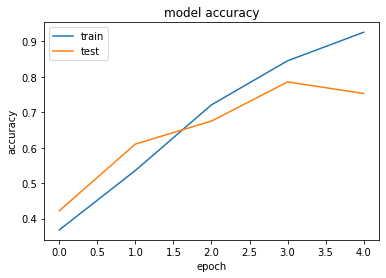

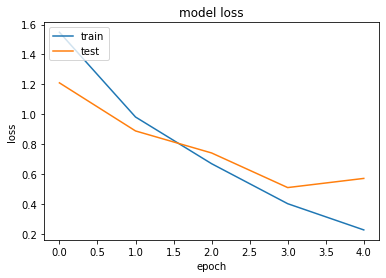

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()